In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import nltk
import re
import mpld3
from  TextCleaner2000.TextCleaner import TextCleaner

In [2]:
wian_df=pd.read_csv('DATA.OLD\\SBMA_PYTHON.csv')


In [3]:
wian_df2=pd.read_csv("DATA.OLD\\SBMA_PYTHON3.csv")

In [4]:
word_list1=wian_df["TITLE"].astype(str)

In [5]:
wian_df2=wian_df[["TITLE","PUBYEAR"]]

In [6]:
#USe my stop word remove tool, and to normalize text
#Set the directory to where you have downloaded and unzipped WordCleaner

cleaner = TextCleaner("TextCleaner2000")

In [7]:
#Remove non-alphanumeric characters and replace with blank

clean_list=cleaner.alpha_iterator(wian_df["TITLE"])

In [8]:
clean_list_beta= cleaner.stop_word_iterator(clean_list)


In [9]:
clean_list_theta=[x.split(' ') for x in clean_list_beta]

In [10]:
clean_listdf=DataFrame(clean_list_theta)

In [11]:
clean_listdf2=clean_listdf.stack()

In [12]:
clean_listdf2=DataFrame(clean_listdf2)

In [13]:
clean_listdf2.columns=["words"]

In [14]:
clean_listdf3=clean_listdf2["words"].dropna()

In [15]:
clean_listdf2.head()

words
0 0  hereditary
  1    proximal
  2  neurogenic
  3    muscular
  4     atrophy

In [16]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

from sklearn.cluster import KMeans
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [17]:
#IF you haven't downloaded the full NLTK package resources.
#Otherwise, you can comment out nltk.Download()
nltk.download('punkt')
word_list2=[tokenize_only(x) for x in wian_df["TITLE"]]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:
remove_words = ('sbma', 'spinal muscular',
             'spinal bulbar', 'spinal', 'muscular','atrophy', 'bulbar','spinal muscular atrophy', 
             'spinal bulbar muscular atrophy', "kennedy's", 'kennedy', 'disease', 'diseases', 'syndrome',
               'atrophy', 'kennedy-', 's', "patient","type","bulbospinal","case","study","clinical","adult","family","patients",
               "disorders", "report","bulbo","mouse","model","spinobulbar","analysis","disorders")

In [101]:
word_list1 = cleaner.custom_stop_word_iterator(clean_list_beta, remove_words)

In [103]:
word_list3=[tokenize_only(x) for x in wian_df2["TITLE"]]

In [104]:
vocab_frame = pd.DataFrame({'words': word_list2})

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, ngram_range=(1,3), tokenizer=tokenize_only)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(word_list1) #fit the vectorizer to synopses

print(tfidf_matrix.shape)




Wall time: 484 ms
(910, 124)


In [106]:
#We will use these terms to define the words in the clusters
terms = tfidf_vectorizer.get_feature_names()



In [107]:
terms

['aggregation',
 'als',
 'alter',
 'alter sung',
 'ameliorates',
 'amyotrophic',
 'amyotrophic lateral',
 'amyotrophic lateral sclerosis',
 'amyotrophy',
 'androgen',
 'androgen insensitivity',
 'androgen receptor',
 'androgen receptor gene',
 'androgen receptors',
 'associated',
 'binding',
 'cag',
 'cag repeat',
 'cag repeats',
 'cancer',
 'cases',
 'cell',
 'cells',
 'death',
 'degeneration',
 'degradation',
 'dependent',
 'diagnosis',
 'dna',
 'dysfunction',
 'expanded',
 'expanded androgen',
 'expanded androgen receptor',
 'expanded polyglutamine',
 'expansion',
 'expression',
 'familial',
 'features',
 'function',
 'gene',
 'genes',
 'genetic',
 'genetics',
 'glutamine',
 'hereditary',
 'hsp',
 'human',
 'huntington',
 'insensitivity',
 'instability',
 'involvement',
 'late',
 'late onset',
 'lateral',
 'lateral sclerosis',
 'length',
 'linked',
 'linked recessive',
 'linked recessive neuronopathy',
 'lower',
 'male',
 'mechanisms',
 'mediated',
 'mice',
 'models',
 'molecular',


In [108]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print()
print()



In [109]:
dist

array([[-2.22044605e-16,  7.46879062e-01,  5.89479118e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 7.46879062e-01, -2.22044605e-16,  6.15746791e-01, ...,
         1.00000000e+00,  8.48493134e-01,  1.00000000e+00],
       [ 5.89479118e-01,  6.15746791e-01,  0.00000000e+00, ...,
         1.00000000e+00,  7.54280570e-01,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -2.22044605e-16,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  8.48493134e-01,  7.54280570e-01, ...,
         1.00000000e+00,  0.00000000e+00,  8.09472008e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  8.09472008e-01,  0.00000000e+00]])

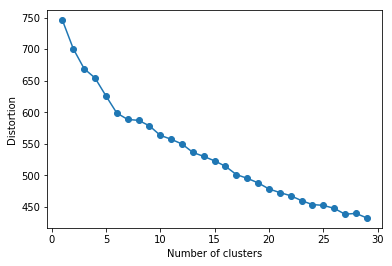

In [110]:

distortions=[]
for i in range(1,30):
    km=KMeans(n_clusters=i,
              init='random',
             n_init=10,
             max_iter=300,
             random_state=0)
    km.fit(tfidf_matrix)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [111]:
from sklearn.externals import joblib
joblib.dump(km,  'DATA.OUT\\doc_cluster.pkl')

['DATA.OUT\\doc_cluster.pkl']

In [112]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

#joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('DATA.OUT\\doc_cluster.pkl')
clusters = km.labels_.tolist()

In [113]:
from sklearn.cluster import KMeans

num_clusters = 15
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10,random_state=0, tol=1e-04)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 974 ms


In [114]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [115]:
#This gives us the names of each cluster
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" %i)
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        #print('%s' %vocab_frame6.ix[terms[ind]].values.toarray())
        print('%s' %vocab_frame.ix[terms[ind].split(',')])
        #print(' %s' % vocab_frame6.ix[terms[ind]])

    
    
   




Top terms per cluster:

Cluster 0 words:
              words
polyglutamine   NaN
        words
protein   NaN
        words
genetic   NaN
              words
trinucleotide   NaN
       words
repeat   NaN
             words
pathogenesis   NaN
Cluster 1 words:
         words
receptor   NaN
                  words
androgen receptor   NaN
         words
androgen   NaN
              words
polyglutamine   NaN
       words
mutant   NaN
                         words
mutant androgen receptor   NaN
Cluster 2 words:
          words
molecular   NaN
          words
diagnosis   NaN
         words
genetics   NaN
                   words
molecular genetics   NaN
             words
pathogenesis   NaN
              words
insensitivity   NaN
Cluster 3 words:
    words
cag   NaN
     words
gene   NaN
                       words
androgen receptor gene   NaN
              words
receptor gene   NaN
           words
cag repeat   NaN
       words
repeat   NaN
Cluster 4 words:
              words
neuromuscular

C:\Users\johnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()



    words
dna   NaN
           words
neuropathy   NaN
      words
cases   NaN
Cluster 9 words:
         words
features   NaN
          words
molecular   NaN
      words
cases   NaN
             words
neuronopathy   NaN
       words
muscle   NaN
        words
genetic   NaN
Cluster 10 words:
                       words
polyglutamine expanded   NaN
         words
expanded   NaN
                  words
expanded androgen   NaN
                           words
expanded androgen receptor   NaN
                                words
polyglutamine expanded androgen   NaN
              words
polyglutamine   NaN
Cluster 11 words:
                              words
amyotrophic lateral sclerosis   NaN
                    words
amyotrophic lateral   NaN
          words
sclerosis   NaN
                  words
lateral sclerosis   NaN
        words
lateral   NaN
            words
amyotrophic   NaN
Cluster 12 words:
            words
progressive   NaN
           words
amyotrophy   NaN
         words
f

In [151]:


#set up cluster names using a dict
cluster_names = {0: 'Excluded Terms: Disease Names',
                 1: 'Polyglutamine-Expansion/Expanded, Androgen Receptor', 
                 2: 'Molecular, Androgen Receptor', 
                 3: 'CAG Reapeat, Trinucleotide',
                 4: 'Neuromuscular', 
                 5: 'Muscle, Skeleton, Fibers', 
                 6: 'X-Chromosome, X-Linked', 
                 7: 'Sensory Involvement',
                 8: 'X-Linked', 
                 9: 'Clicnical, Onset, Features', 
                 10: 'Polyglutamine-Expanded', 
                 11: 'Motor Neuron Disease',
                 12: 'Sex-Linked, Progressive, Muscle', 
                 13: 'Neurodegenerative Disease', 
                 14: 'Motor Neuron, Degenerative'
               }



In [123]:
import mpld3
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}


C:\Users\johnb\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


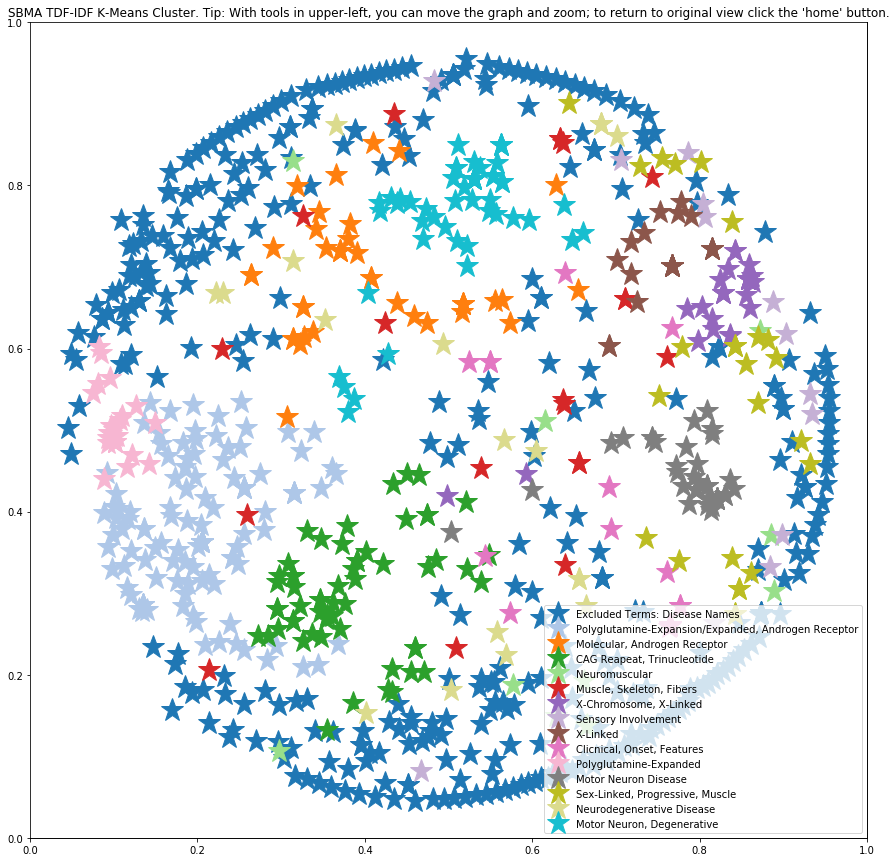

In [159]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=wian_df["TITLE"]) )

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}
background.mlpd3-background{

    background-color:black;
}
g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -50px;
margin-right: 50px;}
"""

NUM_COLORS = 15

cm = plt.get_cmap('tab20') #tab20
# set up plot

fig, ax = plt.subplots(figsize=(15,15), sharex=True, sharey=True) # set size
ax = fig.add_subplot(111)
ax.margins(0.05) #ptional, just adds 5% padding to the autoscaling

ax.set_color_cycle([cm(i/NUM_COLORS ) for i in range(NUM_COLORS)])
#1.*i/NUM_COLORS)
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='*', ms=24,linestyle='',
                     label=cluster_names[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=5, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

ax.legend(numpoints=1,loc="lower right") #show legend with only one dot

plt.title("SBMA TDF-IDF K-Means Cluster. Tip: With tools in upper-left, you can move the graph and zoom; to return to original view click the 'home' button.")



#mpld3.enable_notebook()
#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
mpld3.save_html(fig,"sbma.html")